<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [33]:
# REGRESSION PROBLEM

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data() 

y_train[0] 

15.2

In [34]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # we save it in logs and name it as a date 
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
X_train.shape

(404, 13)

In [36]:
import sklearn
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

# Fit the Scaler on a training dataset

scaler.fit(X_train)

# Then we tranform both training and testing data 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

inputs = X_train.shape[1] # 13 because we have 13 features
batch_size = 10

model = Sequential([
    Dense(8, activation='relu', input_shape=(inputs,)),
    Dense(16, activation='relu'),
    Dense(1)
])

In [38]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae']) # we could also use optimizer='adam'

history = model.fit(X_train_scaled, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, callbacks=[tensorboard_callback])
# we could also do validation_split = 0.2 for example instead of validation_data

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/sample - loss: 560.3870 - mse: 560.3870 - mae: 21.6096 - val_loss: 14642.7612 - val_mse: 14642.7627 - val_mae: 119.0295
Epoch 2/100
404/404 [==============================] - 0s 252us/sample - loss: 519.6246 - mse: 519.6246 - mae: 20.6177 - val_loss: 93932.1789 - val_mse: 93932.1797 - val_mae: 297.3792
Epoch 3/100
404/404 [==============================] - 0s 235us/sample - loss: 468.5193 - mse: 468.5193 - mae: 19.4205 - val_loss: 279870.6415 - val_mse: 279870.6562 - val_mae: 511.1938
Epoch 4/100
404/404 [==============================] - 0s 237us/sample - loss: 406.9685 - mse: 406.9684 - mae: 17.8989 - val_loss: 577003.1085 - val_mse: 577003.1250 - val_mae: 733.1036
Epoch 5/100
404/404 [==============================] - 0s 368us/sample - loss: 336.8341 - mse: 336.8341 - mae: 16.1321 - val_loss: 1052303.9118 - val_mse: 1052303.8750 - val_mae: 992.4198
Epoch 6/100
404/404 [=======

In [39]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 3728), started 1 day, 13:27:13 ago. (Use '!kill 3728' to kill it.)

In [40]:
# MULTIPLE INPUTS

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

inputs = tf.keras.Input(shape=(13,))
inputs.shape


TensorShape([None, 13])

In [41]:
dense = Dense(8, activation="relu")
x = dense(inputs)
x

<tf.Tensor 'dense_18/Identity:0' shape=(None, 8) dtype=float32>

In [42]:
x = Dense(16, activation="relu")(x)
outputs = Dense(1)(x)
outputs

<tf.Tensor 'dense_20/Identity:0' shape=(None, 1) dtype=float32>

In [19]:
model1 = tf.keras.Model(inputs=inputs, outputs=outputs, name="housing_model")
model1

In [43]:
model1.summary()

Model: "housing_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [44]:
model1.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test, y_test), epochs=100, batch_size =10, callbacks=[tensorboard_callback])

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 237us/sample - loss: 9.9401 - mse: 9.9401 - mae: 2.2217 - val_loss: 3264654.7500 - val_mse: 3264654.7500 - val_mae: 1759.2559
Epoch 2/100
404/404 [==============================] - 0s 237us/sample - loss: 9.8646 - mse: 9.8646 - mae: 2.2194 - val_loss: 3223815.2941 - val_mse: 3223815.2500 - val_mae: 1747.9640
Epoch 3/100
404/404 [==============================] - 0s 210us/sample - loss: 9.8135 - mse: 9.8135 - mae: 2.2126 - val_loss: 3169349.0049 - val_mse: 3169349.2500 - val_mae: 1732.5120
Epoch 4/100
404/404 [==============================] - 0s 239us/sample - loss: 9.7530 - mse: 9.7530 - mae: 2.2042 - val_loss: 3209564.2304 - val_mse: 3209564.2500 - val_mae: 1745.1188
Epoch 5/100
404/404 [==============================] - 0s 215us/sample - loss: 9.7931 - mse: 9.7931 - mae: 2.2193 - val_loss: 3066583.8824 - val_mse: 3066583.7500 - val_mae: 1704.9329
Epoch 6/100
404/404 [=============

In [45]:
# import pydot 
# from IPython.display import SVG

# tf.keras.utils.plot_model(model1, "my_first_model.png")

In [27]:
# tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [48]:
from tensorflow.keras.datasets import mnist

In [52]:
%pwd

'C:\\Users\\Khisl\\Desktop\\Projects\\DS-Unit-4-Sprint-2-Neural-Networks\\module3-Intro-to-Keras'

In [58]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
X_train.shape

(60000, 28, 28)

In [78]:
%load_ext tensorboard
import os, datetime
import tensorflow as tf

logdir = os.path.join('logs1', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [79]:
y_train # the numbers are not one-hot encoded, that's why we need to either one-hot encode them 

# OR use a sparse_categorical_crossentropy instead of categorical_crossentropy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)), # We are flattening our images because right now they have a square shape 28x28 pixels
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x = X_train,
         y = y_train,
         epochs = 10,
         validation_data=(X_test, y_test),
         callbacks = [tensorboard_callback])

# callbacks: at the end of each epoch, it collects data that we want to be monitored: accuracy score, loss number for both 
# training and validation data 


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.0448 - accuracy: 0.8400 - val_loss: 5.5270 - val_accuracy: 0.8859
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 6.1470 - accuracy: 0.8781 - val_loss: 6.4055 - val_accuracy: 0.8607
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 5.7185 - accuracy: 0.8824 - val_loss: 5.9373 - val_accuracy: 0.8914
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 5.4996 - accuracy: 0.8857 - val_loss: 5.8653 - val_accuracy: 0.8811
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 5.4368 - accuracy: 0.8867 - val_loss: 5.8743 - val_accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 5.3522 - accuracy: 0.8878 - val_loss: 6.5059 - val_accuracy: 0.8757
Epoch 7/10
60000/60000 [==============================]

In [87]:
%tensorboard --logdir logs1

Reusing TensorBoard on port 6006 (pid 24680), started 0:04:28 ago. (Use '!kill 24680' to kill it.)

In [103]:
import numpy
import pandas as pd
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping


logdir = os.path.join("logs", "Additional layers, different optimizer, more callbacks") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# Start neural network
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(units=116, activation='relu'),
                    Dense(units=120, activation='relu'),
                    Dense(units=10, activation='softmax')])

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, mode='auto')

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x=X_train, 
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          callbacks = [tensorboard_callback, stop])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 1.7481 - accuracy: 0.8739 - val_loss: 0.5123 - val_accuracy: 0.9199
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4229 - accuracy: 0.9313 - val_loss: 0.3987 - val_accuracy: 0.9404
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2930 - accuracy: 0.9448 - val_loss: 0.2748 - val_accuracy: 0.9395
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2585 - accuracy: 0.9533 - val_loss: 0.3074 - val_accuracy: 0.9550
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2560 - accuracy: 0.9553 - val_loss: 0.3031 - val_accuracy: 0.9494
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2645 - accuracy: 0.9572 - val_loss: 0.3298 - val_accuracy: 0.9566
Epoch 7/10
60000/60000 [==============================] 

In [111]:
history.history

{'loss': [1.748103905106996,
  0.42286932041484443,
  0.29296286603430444,
  0.25847953067864293,
  0.25600925401390606,
  0.26445933632811064,
  0.2568932819607459],
 'accuracy': [0.8738667,
  0.93128335,
  0.94476664,
  0.9533333,
  0.95533335,
  0.9572,
  0.95776665],
 'val_loss': [0.5123068806140131,
  0.39865211341156975,
  0.27482241984815337,
  0.3074018521786784,
  0.30313292219445576,
  0.3298278369130101,
  0.42758461901836564],
 'val_accuracy': [0.9199, 0.9404, 0.9395, 0.955, 0.9494, 0.9566, 0.9447]}

In [116]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

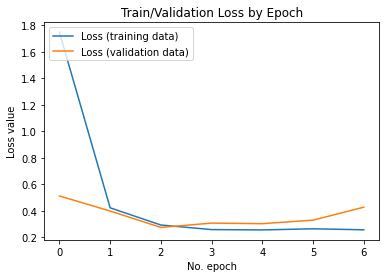

In [118]:
import matplotlib.pyplot as plt
# Plot history
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Train/Validation Loss by Epoch')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

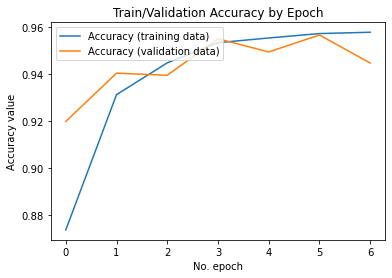

In [119]:
import matplotlib.pyplot as plt
# Plot history
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Train/Validation Accuracy by Epoch')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [102]:
%tensorboard --logdir logs1

Reusing TensorBoard on port 6006 (pid 24680), started 3:15:08 ago. (Use '!kill 24680' to kill it.)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.